# Transit Access to Parks in Philadelphia and the Logan Neighborhood

#### Author: Cassie Truong

Description: This data will be looking at public transit access to public parks in Philadelphia (city wide) in comparison to the Logan Nieghborhood. Transit that will be used is regional. 

## Importing Libraries

Libraries below will be used to review, clean, and map transit lines, transit stations, as well as park and recreation data in Philadelphia.

In [1]:
# importing libraries
import pandas as pd
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Reading Geojson files

In [2]:
PPR = gpd.read_file('PPR_Properties.geojson')

Understanding what kind of data types the data set consists of and whether any dtypes need to be converted into strings for ease of plotting and mapping.

In [3]:
PPR.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OBJECTID                 510 non-null    int64   
 1   PUBLIC_NAME              510 non-null    object  
 2   PARENT_NAME              510 non-null    object  
 3   NESTED                   510 non-null    object  
 4   OFFICIAL_NAME            284 non-null    object  
 5   LABEL                    510 non-null    object  
 6   ALIAS                    353 non-null    object  
 7   DPP_ASSET_ID             510 non-null    int64   
 8   ADDRESS_911              502 non-null    object  
 9   ZIP_CODE                 510 non-null    object  
 10  ADDRESS_BRT              455 non-null    object  
 11  ALIAS_ADDRESS            426 non-null    object  
 12  ACREAGE                  510 non-null    float64 
 13  PROPERTY_CLASSIFICATION  510 non-null    object  
 14  PP

To further understand what's included in the dataset, I'm going to sample the first five lines.

In [4]:
PPR.tail()

,OBJECTID,PUBLIC_NAME,PARENT_NAME,NESTED,OFFICIAL_NAME,LABEL,ALIAS,DPP_ASSET_ID,ADDRESS_911,ZIP_CODE,...,PPR_OPS_DISTRICT,COUNCIL_DISTRICT,POLICE_DISTRICT,CITY_SCALE_MAPS,LOCAL_SCALE_MAPS,PROGRAM_SITES,COMMENTS,Shape__Area,Shape__Length,geometry
505,506,Officer Robert Hayes Memorial Playground,Officer Robert Hayes Memorial Playground,N,Officer Robert Hayes Memorial Playground,Hayes,"Swenson Park, Conwell",1923,9949 PRESIDENT ST,19115,...,1,10,7,Y,Y,Y,None,139660.027344,1698.902277,"POLYGON ((-75.02110 40.08925, -75.02113 40.089..."
506,507,Benjamin Franklin Parkway,Benjamin Franklin Parkway,N,Benjamin Franklin Parkway,Benjamin Franklin Pkwy,The Parkway,1226,BENJ FRANKLIN PKY,0,...,5,5,9,Y,Y,N,22nd and Hamilton 'wedge' added (Street Legal ...,103066.453125,9195.466911,"MULTIPOLYGON (((-75.16788 39.95576, -75.16790 ..."
507,508,Winter Street Greenway,Benjamin Franklin Parkway,Y,None,Winter Greenway,Rob Stuart Memorial Dog Park; Winter Street Gr...,0,BENJ FRANKLIN PKY,0,...,5,5,9,N,Y,N,Named in 2021. Winter (21st-22nd) has a dog pa...,5386.812500,679.857371,"MULTIPOLYGON (((-75.17521 39.95933, -75.17410 ..."
508,509,61st and Cobbs Creek Park,Cobbs Creek Park,Y,None,61st and Cobbs Creek,,3481,61ST & COBBS CREEK,19143,...,8,3,18,Y,Y,Y,None,35596.937500,1037.395645,"POLYGON ((-75.24796 39.94538, -75.24809 39.945..."
509,510,Lawrence Court Breezeways,Lawrence Court Breezeways,N,None,Lawrence Breezeway,Lawrence Court Walkways,3867,335 LAWRENCE CT,19106,...,5,1,6,N,Y,N,None,1945.863281,394.259401,"MULTIPOLYGON (((-75.14944 39.94398, -75.14942 ..."


No columns needed to be converted. Let's map.

# Parks in Philadelphia (City wide)

<AxesSubplot: >

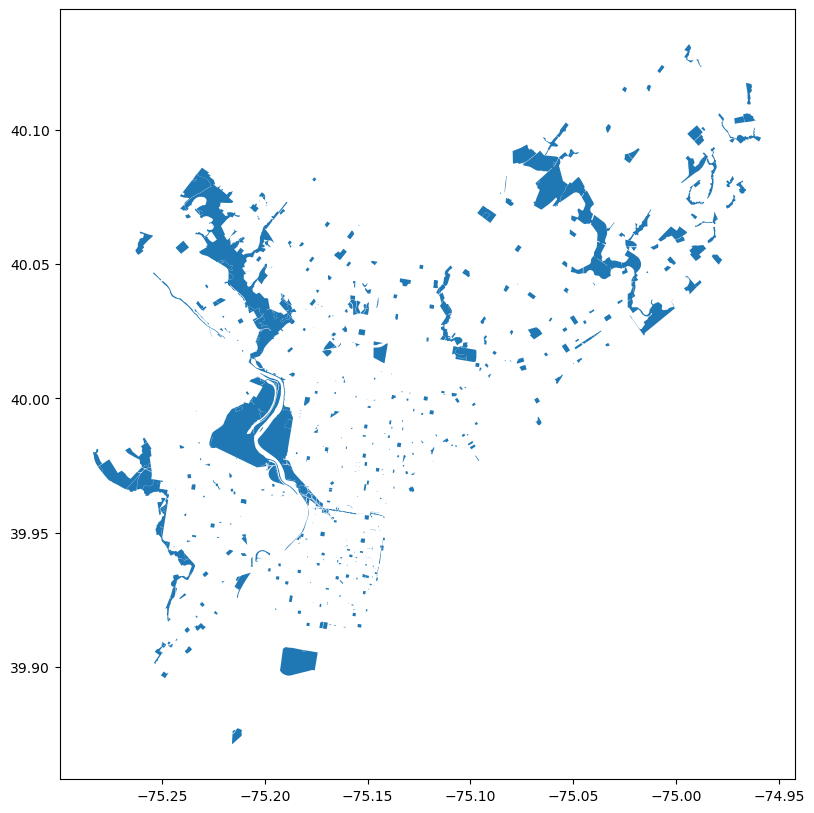

In [5]:
PPR.plot(figsize=(12,10))

### Adding a basemap

Below, I'm checking what the crs code so that the coordinates could be correctly matched to the basemap.

In [6]:
PPR.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

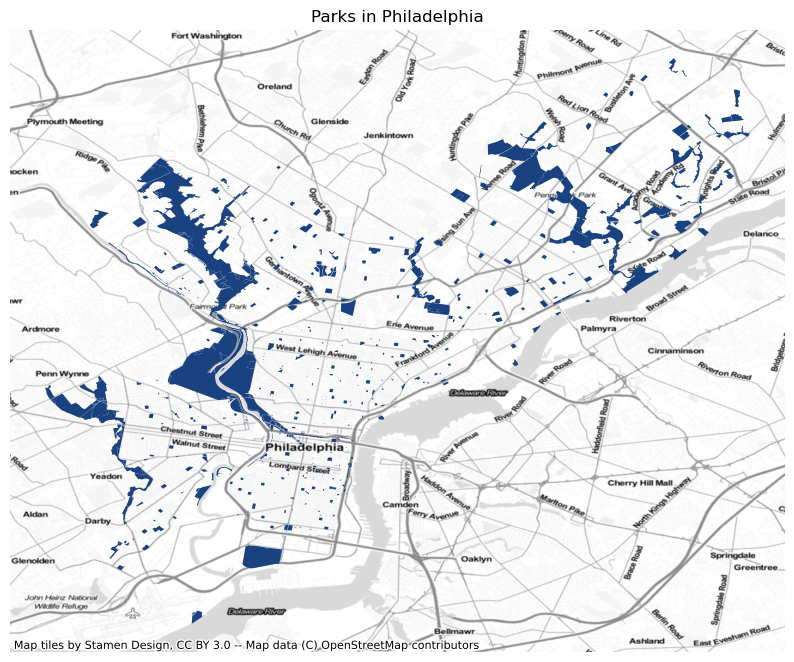

In [7]:
# add basemap
fig, ax = plt.subplots(figsize=(10,10))


PPR.plot(ax=ax,
marker='X',
markersize=20,
color='#1a4280ff')


ax.axis('off')


ax.set_title('Parks in Philadelphia')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=4326)

Philadelphia city wide has about 509 parks. Logan neighborhood is north of the city center and will be explored below. 

## Creating desired columns

I'm going to generate a new variable with only the needed columns. 

In [8]:
#reviewing data with only desired columns
PPR[['PUBLIC_NAME', 'ZIP_CODE', 'ACREAGE', 'Shape__Area', 'Shape__Length', 'geometry']]

,PUBLIC_NAME,ZIP_CODE,ACREAGE,Shape__Area,Shape__Length,geometry
0,William H (Billy) Markward Memorial Playground,19146,3.379144,23295.664062,892.868012,"POLYGON ((-75.18383 39.94816, -75.18370 39.948..."
1,Schuylkill Banks,19103,14.717255,101477.171875,9300.670275,"POLYGON ((-75.18103 39.96361, -75.18075 39.963..."
2,Schuylkill River Park,19146,3.947826,27216.929688,799.048584,"POLYGON ((-75.18314 39.94821, -75.18307 39.948..."
3,Frankford Boat Launch,19137,11.369730,78515.335938,1585.376114,"POLYGON ((-75.05596 40.00750, -75.05601 40.007..."
4,Orthodox Street Park,19137,10.567337,72926.187500,1304.901416,"POLYGON ((-75.06707 39.99007, -75.06713 39.990..."
...,...,...,...,...,...,...
505,Officer Robert Hayes Memorial Playground,19115,20.173298,139660.027344,1698.902277,"POLYGON ((-75.02110 40.08925, -75.02113 40.089..."
506,Benjamin Franklin Parkway,0,14.944706,103066.453125,9195.466911,"MULTIPOLYGON (((-75.16788 39.95576, -75.16790 ..."
507,Winter Street Greenway,0,0.781292,5386.812500,679.857371,"MULTIPOLYGON (((-75.17521 39.95933, -75.17410 ..."
508,61st and Cobbs Creek Park,19143,5.163878,35596.937500,1037.395645,"POLYGON ((-75.24796 39.94538, -75.24809 39.945..."


In [9]:
#creating new variable with desired columns
desired_columns = ['PUBLIC_NAME', 'ZIP_CODE', 'ACREAGE', 'Shape__Area', 'Shape__Length', 'geometry']

In [10]:
PPR[desired_columns].sample(5)

,PUBLIC_NAME,ZIP_CODE,ACREAGE,Shape__Area,Shape__Length,geometry
184,48th and Woodland Playground,19143,4.846575,33406.156250,748.801688,"POLYGON ((-75.21113 39.94238, -75.21106 39.942..."
482,31st and York Courts,19132,0.226897,1566.296875,166.361882,"POLYGON ((-75.18283 39.99312, -75.18278 39.993..."
30,Jose Manuel Collazo Park,19140,1.539125,10626.722656,413.465264,"POLYGON ((-75.13112 39.99922, -75.13096 39.999..."
366,Hamilton Park,19140,0.177015,1222.523438,148.013854,"POLYGON ((-75.13850 40.00895, -75.13846 40.009..."
284,Kelly Pool,19131,1.328415,9166.417969,397.378588,"POLYGON ((-75.20829 39.97909, -75.20820 39.979..."


I narrowed down the columns to ones that I think might help me generate the maps and graphs below and tested them above by sampling five rows.

# Logan Neighborhood Focus

### Querying Data

Since the Logan Neighborhood is located within two zip codes, I will be querying the data to 19140 and 19141.

In [11]:
#querying to only parks in zip code 19140
PPR[desired_columns].query("ZIP_CODE == '19140'")

,PUBLIC_NAME,ZIP_CODE,ACREAGE,Shape__Area,Shape__Length,geometry
11,Hunting Park,19140,71.100807,491156.050781,4036.792375,"MULTIPOLYGON (((-75.14053 40.01886, -75.14054 ..."
30,Jose Manuel Collazo Park,19140,1.539125,10626.722656,413.465264,"POLYGON ((-75.13112 39.99922, -75.13096 39.999..."
37,Butler and Percy Play Lot,19140,0.143279,989.558594,124.780907,"POLYGON ((-75.14327 40.01011, -75.14297 40.010..."
42,Hunting Park Recreation Center,19140,5.366108,37069.863281,823.172364,"POLYGON ((-75.14436 40.01833, -75.14399 40.018..."
112,Stenton Park,19140,14.764821,102017.289062,1257.834669,"POLYGON ((-75.15453 40.02389, -75.15443 40.024..."
128,Wingohocking Park,19140,8.343812,57644.414062,1312.977499,"POLYGON ((-75.14540 40.01999, -75.14556 40.019..."
167,Ramonita Negron Rivera Recreation and Communit...,19140,5.447051,37609.671875,864.047529,"POLYGON ((-75.13638 40.00066, -75.13635 40.000..."
280,Jerome Brown Playground,19140,2.578233,17805.070312,878.415471,"MULTIPOLYGON (((-75.16095 40.00600, -75.16093 ..."
339,Corporal George J Reed Jr Memorial Playground,19140,0.396650,2738.859375,222.705226,"POLYGON ((-75.13309 40.00277, -75.13311 40.002..."
344,John (Steve) Schmidt Playground,19140,0.366597,2531.320312,223.887683,"POLYGON ((-75.12917 40.00175, -75.12919 40.001..."


In [12]:
#saving query
PPR_19140 = PPR[desired_columns].query("ZIP_CODE == '19140'")

In [13]:
PPR_19140.count()

PUBLIC_NAME      14
ZIP_CODE         14
ACREAGE          14
Shape__Area      14
Shape__Length    14
geometry         14
dtype: int64

In [14]:
#querying to only parks in zip code 19141
PPR[desired_columns].query("ZIP_CODE == '19141'")

,PUBLIC_NAME,ZIP_CODE,ACREAGE,Shape__Area,Shape__Length,geometry
68,Wisters Woods Park,19141,61.003105,421621.656250,7417.853171,"MULTIPOLYGON (((-75.15083 40.03498, -75.15076 ..."
97,Wakefield Park,19141,14.648081,101235.574219,1975.179957,"MULTIPOLYGON (((-75.14980 40.03126, -75.14982 ..."
130,Fanny Kemble Abolitionist Memorial Park,19141,8.000155,55301.839844,1088.010199,"POLYGON ((-75.14992 40.04035, -75.14988 40.040..."
151,Morris Estate Cultural Center,19141,6.381253,44124.652344,922.500305,"POLYGON ((-75.14528 40.05086, -75.14566 40.050..."
169,A Albert Cherashore Playground,19141,5.240547,36223.695312,770.965730,"POLYGON ((-75.13607 40.03725, -75.13609 40.037..."
219,Harpers Hollow Park,19141,3.600784,24892.335938,948.249227,"POLYGON ((-75.15040 40.04213, -75.15045 40.042..."
259,Clarkson Park,19141,2.071382,14317.015625,797.203313,"POLYGON ((-75.14475 40.03704, -75.14476 40.036..."
279,Shevchenko Park,19141,1.320621,9127.457031,500.982518,"POLYGON ((-75.14498 40.03494, -75.14531 40.034..."


In [15]:
#saving query
PPR_19141 = PPR[desired_columns].query("ZIP_CODE == '19141'")

In [16]:
PPR_19141.count()

PUBLIC_NAME      8
ZIP_CODE         8
ACREAGE          8
Shape__Area      8
Shape__Length    8
geometry         8
dtype: int64

## Mapping Logan Neighborhood by Zip Code 

<AxesSubplot: >

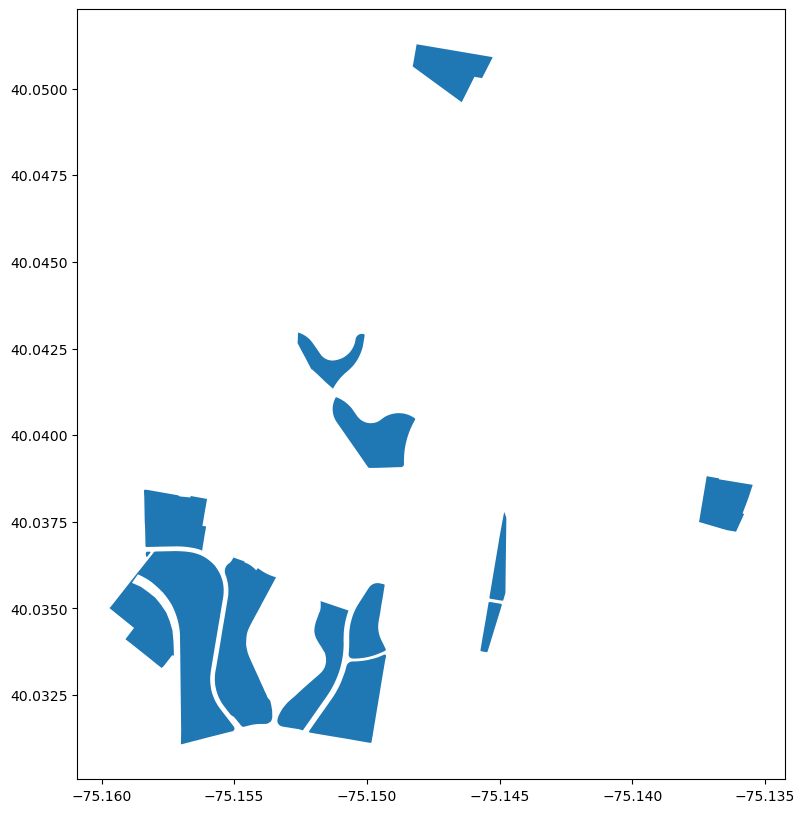

In [17]:
#creating a general plot of parks in 19141
PPR_19141.plot(figsize=(12,10))

<AxesSubplot: >

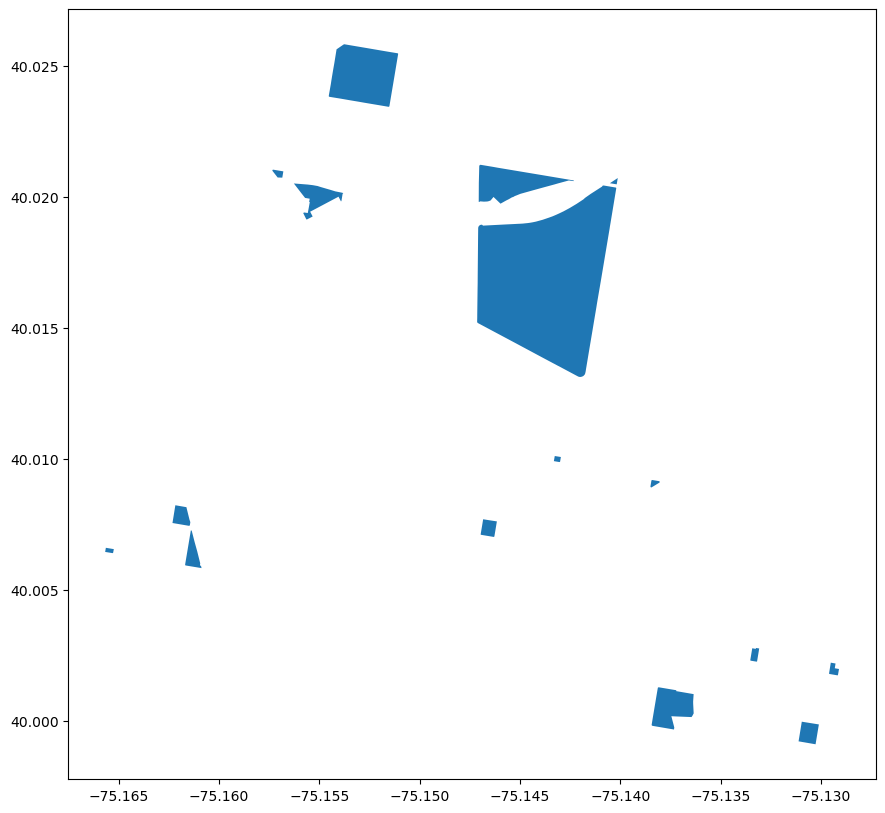

In [18]:
#creating a general plot of parks in 19140
PPR_19140.plot(figsize=(12,10))

## Combining both queries into one map

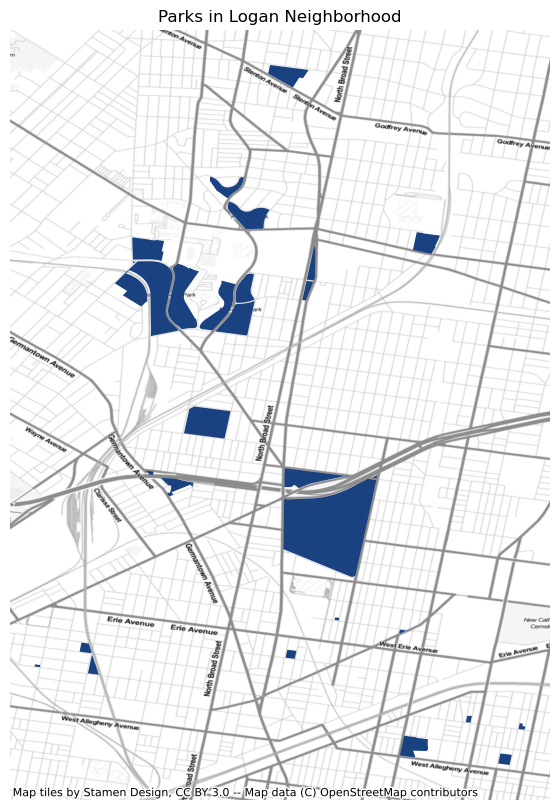

In [19]:
# add basemap
fig, ax = plt.subplots(figsize=(10,10))


PPR_19140.plot(ax=ax,
marker='X',
markersize=20,
color='#1a4280ff')


PPR_19141.plot(ax=ax,
marker='X',
markersize=20,
color='#1a4280ff')


ax.axis('off')


ax.set_title('Parks in Logan Neighborhood')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=4326)

According to the data, only 4.5% of parks are located within the Logan Neighborhood (22 parks of 487). Now let's see if there are any public transit access to these parks.

## Regional Rail and Stations

In [21]:
#import
rail_line = gpd.read_file('Regional_Rail_Lines.geojson')
rail_stations = gpd.read_file('Regional_Rail_Stations.geojson')

In [22]:
rail_line.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         13 non-null     int64   
 1   Route_Name  13 non-null     object  
 2   Miles       13 non-null     float64 
 3   geometry    13 non-null     geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 544.0+ bytes


In [23]:
rail_stations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         156 non-null    int64   
 1   Line_Name   156 non-null    object  
 2   Station_Na  156 non-null    object  
 3   Latitude    156 non-null    float64 
 4   Longitude   156 non-null    float64 
 5   geometry    156 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 7.4+ KB


## Mapping parks with transit lines and stations

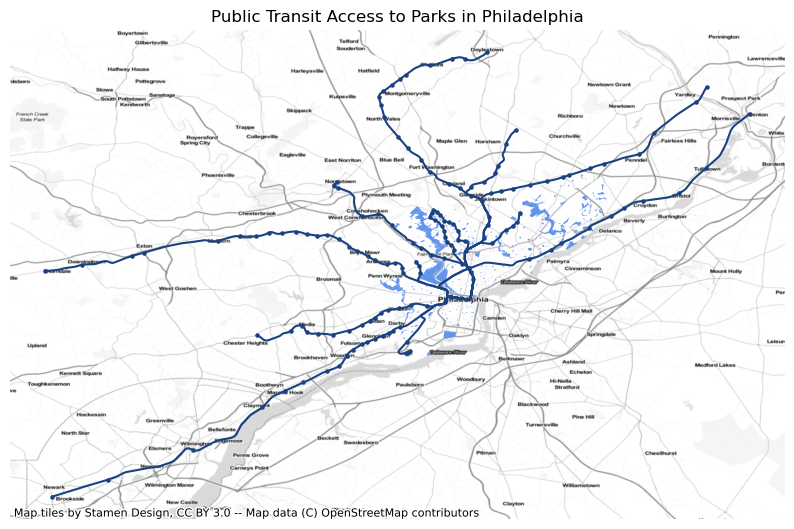

In [24]:
# add basemap
fig, ax = plt.subplots(figsize=(10,10))


PPR.plot(ax=ax,
marker='X',
markersize=20,
color='cornflowerblue')

rail_line.plot(ax=ax,
marker='X',
markersize=20,
color='#1a4280ff')

rail_stations.plot(ax=ax,
marker='.',
markersize=20,
color='#1a4280ff')

ax.axis('off')


ax.set_title('Public Transit Access to Parks in Philadelphia')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=4326)

The map above shows that regional lines and stations are congregated closer to Philadelphia's city center. 

Now, we're going to map the parks in Logan Neighborhood with the regional transit lines and stations.

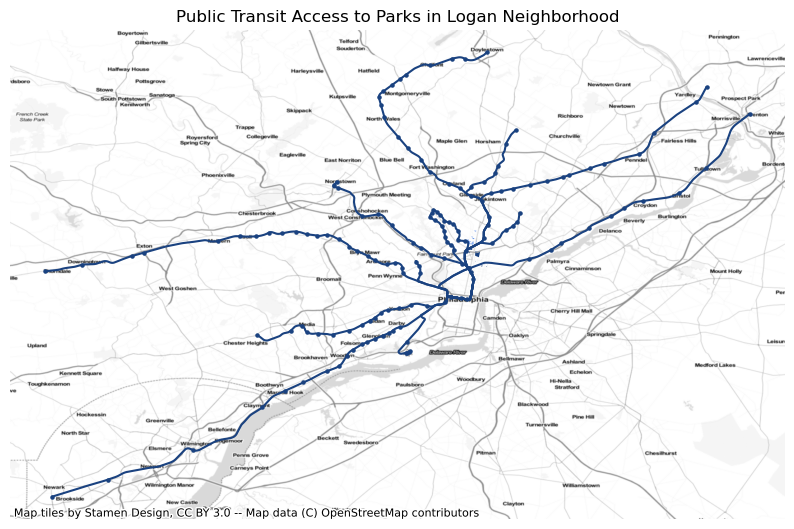

In [25]:
# add basemap
fig, ax = plt.subplots(figsize=(10,10))


PPR_19140.plot(ax=ax,
marker='X',
markersize=20,
color='#1a4280ff')


PPR_19141.plot(ax=ax,
marker='X',
markersize=20,
color='cornflowerblue')

rail_line.plot(ax=ax,
marker='X',
markersize=20,
color='#1a4280ff')

rail_stations.plot(ax=ax,
marker='.',
markersize=20,
color='#1a4280ff')

ax.axis('off')

ax.set_title('Public Transit Access to Parks in Logan Neighborhood')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=4326)

Below, I'll be querying rail lines and stations that are within the Logan Neighborhood zip codes. The rail line that run through Logan Neighborhood is Fox Chase. The regional station located in this neighborhood is Wayne. I'm going to subset the line and station to (hopefully) zoom in on Logan Triangle. 

In [26]:
#looking to see the naming convention of stations, specifically if there's "Station" after each name. 
rail_stations.Station_Na

0         Airport Terminal A
1         Airport Terminal B
2      Airport Terminals C&D
3      Airport Terminals E&F
4                   Eastwick
               ...          
151                  Norwood
152            Prospect Park
153              Ridley Park
154              Sharon Hill
155               Wilmington
Name: Station_Na, Length: 156, dtype: object

In [27]:
#reviewed google maps and it showed that the sole regional station within the area is Wayne. Going to query Wayne.
rail_stations.query("Station_Na == 'Wayne'")

,FID,Line_Name,Station_Na,Latitude,Longitude,geometry
106,107,Paoli Thorndale Line,Wayne,40.045853,-75.387252,POINT (-75.38725 40.04585)


In [28]:
#saving the variable
wayne = rail_stations.query("Station_Na == 'Wayne'")

In [29]:
#confirming
wayne

,FID,Line_Name,Station_Na,Latitude,Longitude,geometry
106,107,Paoli Thorndale Line,Wayne,40.045853,-75.387252,POINT (-75.38725 40.04585)


In [30]:
#reviewing the rail names 
rail_line.Route_Name

0                 Airport
1      Chestnut Hill East
2      Chestnut Hill West
3                  Cynwyd
4               Fox Chase
5     Lansdale/Doylestown
6     Manayunk/Norristown
7              Media/Wawa
8         Paoli/Thorndale
9                 Trenton
10             Warminster
11           West Trenton
12      Wilmington/Newark
Name: Route_Name, dtype: object

In [31]:
#subsetting the rail line
rail_line.query("Route_Name == 'Fox Chase'")

,FID,Route_Name,Miles,geometry
4,31,Fox Chase,12.69189,"LINESTRING (-75.18344 39.95672, -75.18270 39.9..."


In [32]:
#creating a variable for the rail line
foxchase = rail_line.query("Route_Name == 'Fox Chase'")

In [33]:
#confirming
foxchase

,FID,Route_Name,Miles,geometry
4,31,Fox Chase,12.69189,"LINESTRING (-75.18344 39.95672, -75.18270 39.9..."


<AxesSubplot: >

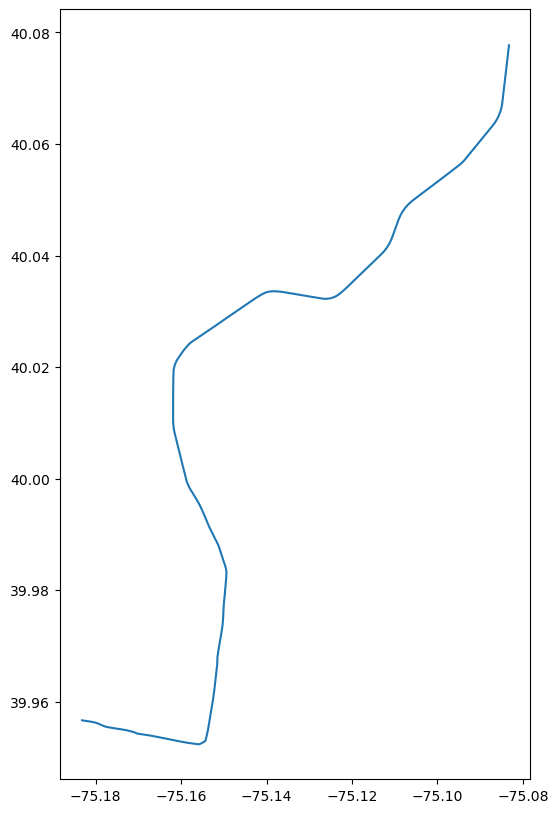

In [34]:
#plotting the rail line
foxchase.plot(figsize=(12,10))

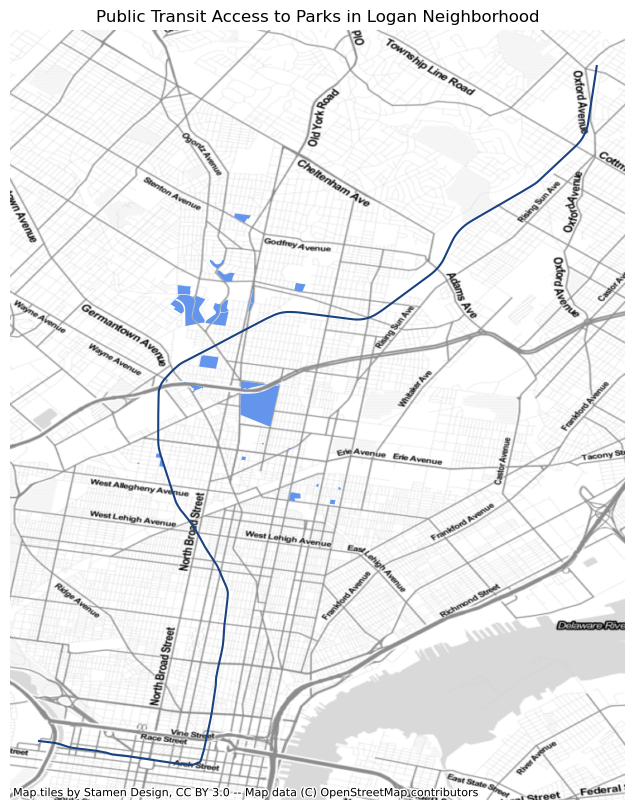

In [35]:
# add basemap
fig, ax = plt.subplots(figsize=(10,10))


PPR_19140.plot(ax=ax,
marker='X',
markersize=20,
color='cornflowerblue')


PPR_19141.plot(ax=ax,
marker='X',
markersize=20,
color='cornflowerblue')

foxchase.plot(ax=ax,
marker='.',
markersize=20,
color='#1a4280ff')

ax.axis('off')

ax.set_title('Public Transit Access to Parks in Logan Neighborhood')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=4326)

The number of stops and regional rail lines that service the Logan Neighborhood and parks are limited. 

## Division of Labor

Deja: Analyzed data in umeployment and food desserts and created static maps and charts.
Olivia: Analyzed housing data and created static/interactive maps and charts. 
Lindsey: Analyzed crime and create static maps and charts.
Cassie: Analyzed parks and transit lines/stations as well as created static maps. 